In [2]:
import pandas as pd

df = pd.read_excel("PCA db.xlsx", sheet_name="winter")


In [4]:
df.head()       # Shows the first five rows
df.info()       # Gives an overview of columns, data types, and non-null counts
df.describe()   # Provides summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  428 non-null    object 
 1   PSSRa    428 non-null    float64
 2   PSSRb    428 non-null    float64
 3   RARSc    428 non-null    float64
 4   PSSRc    428 non-null    float64
 5   CARI     428 non-null    float64
dtypes: float64(5), object(1)
memory usage: 20.2+ KB


,PSSRa,PSSRb,RARSc,PSSRc,CARI
count,428.000000,428.000000,428.000000,428.000000,428.000000
mean,6.543619,5.620592,5.304991,5.334307,1.546201
std,1.628837,1.258628,1.131066,1.150535,0.353665
min,3.620865,3.185210,3.038123,3.019753,0.736208
25%,5.392493,4.747126,4.540540,4.555959,1.296024
50%,6.157062,5.470272,5.153627,5.168651,1.513292
75%,7.395219,6.387661,5.971130,6.062102,1.757582
max,12.239014,10.427906,9.524077,9.581117,2.758396


Free attempt - all indices - straightforward

Accuracy: 0.313953488372093


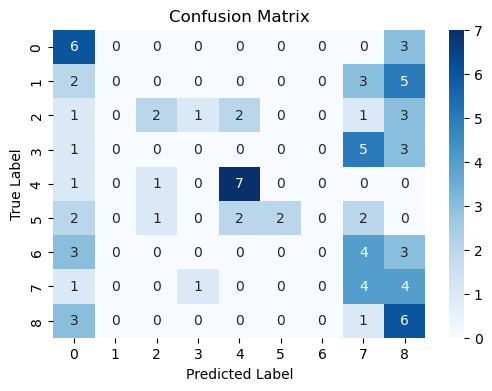

             AVEFA  Barley      ECHCG   Oat      PAPRO      POLAV  Wheat D  \
AVEFA    66.666667     0.0   0.000000   0.0   0.000000   0.000000      0.0   
Barley   20.000000     0.0   0.000000   0.0   0.000000   0.000000      0.0   
ECHCG    10.000000     0.0  20.000000  10.0  20.000000   0.000000      0.0   
Oat      11.111111     0.0   0.000000   0.0   0.000000   0.000000      0.0   
PAPRO    11.111111     0.0  11.111111   0.0  77.777778   0.000000      0.0   
POLAV    22.222222     0.0  11.111111   0.0  22.222222  22.222222      0.0   
Wheat D  30.000000     0.0   0.000000   0.0   0.000000   0.000000      0.0   
Wheat I  10.000000     0.0   0.000000  10.0   0.000000   0.000000      0.0   
Wheat S  30.000000     0.0   0.000000   0.0   0.000000   0.000000      0.0   

           Wheat I    Wheat S  
AVEFA     0.000000  33.333333  
Barley   30.000000  50.000000  
ECHCG    10.000000  30.000000  
Oat      55.555556  33.333333  
PAPRO     0.000000   0.000000  
POLAV    22.222222   0.0000

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'df' is your DataFrame and 'species' is the target column:
X = df.drop("species", axis=1)  # Features
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify= y)

# Initialize and train the SVM classifier
# Here we use the RBF kernel; adjust 'C' and 'kernel' as needed
svm = SVC(kernel='rbf', C=1.0)
svm.fit(X_train, y_train)

# Evaluate the model
accuracy = svm.score(X_test, y_test)
print("Accuracy:", accuracy)

# Compute and plot the confusion matrix
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute confusion matrix percentages for a detailed view
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
class_labels = np.unique(y_test)
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
print(cm_df)


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
# Generate classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

KNN Classification Report:
              precision    recall  f1-score   support

       AVEFA       0.30      0.67      0.41         9
      Barley       0.00      0.00      0.00        10
       ECHCG       0.50      0.20      0.29        10
         Oat       0.00      0.00      0.00         9
       PAPRO       0.64      0.78      0.70         9
       POLAV       1.00      0.22      0.36         9
     Wheat D       0.00      0.00      0.00        10
     Wheat I       0.20      0.40      0.27        10
     Wheat S       0.22      0.60      0.32        10

    accuracy                           0.31        86
   macro avg       0.32      0.32      0.26        86
weighted avg       0.31      0.31      0.26        86



In [18]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Example species lists for each category
monocot_species = ["Barley", "Wheat D", "Wheat I", "Wheat S", "Oat", "AVEFA", "ECHCG"]
dicot_species   = ["PAPRO", "POLAV"]
weed_species    = ["AVEFA", "PAPRO", "POLAV", "ECHCG"]
crop_species    = ["Barley", "Wheat D", "Wheat I", "Wheat S", "Oat"]

# Third-level species groups (adjust as needed)
monocot_weed_species = ["AVEFA", "ECHCG"]
monocot_crop_species = ["Barley", "Wheat D", "Wheat I", "Wheat S", "Oat"]
dicot_weed_species   = ["PAPRO", "POLAV"]

# Assume df is your main DataFrame with features and a 'species' column.
# Create first-level and second-level categories.
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# Select features and target for level 1.
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI"]]
y_cat1 = df["category1"]

# Level 1: Monocot vs. Dicot classification using SVM.
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(
    X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = SVC(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)
y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1.
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

# Level 2 for Monocots: Train weed vs. crop classifier.
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]
X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(
    X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = SVC(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

# Level 2 for Dicots:
# Check if there is any crop data among dicots.
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]
if (y_dicot == 'crop').sum() > 0:
    X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(
        X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
    clf_cat2_dicot = SVC(random_state=42)
    clf_cat2_dicot.fit(X_train_di, y_train_di)
else:
    # If no dicot crop data, set level 2 for dicots to always predict 'weed'
    clf_cat2_dicot = None

# Level 3: Species-level classification models.
# Monocot-Weed model.
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]
clf_mono_weed = SVC(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model.
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]
clf_mono_crop = SVC(random_state=42)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model.
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]
clf_dicot_weed = SVC(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

# Dicot-Crop model: Train only if any dicot crop data exists.
dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
if dicot_crop_mask.sum() > 0:
    X_dicot_crop = X[dicot_crop_mask]
    y_dicot_crop = df['species'][dicot_crop_mask]
    clf_dicot_crop = SVC(random_state=42)
    clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)
else:
    clf_dicot_crop = None

# Final species prediction using the hierarchical approach.
final_species_preds = []

for idx in X_test_cat1.index:
    # Level 1: Predict monocot/dicot.
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    
    if cat1_pred == 'monocot':
        # Level 2 (monocot): Use classifier to decide weed vs. crop.
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        # Level 2 (dicot): If classifier exists, use it; otherwise, default to 'weed'.
        if clf_cat2_dicot is not None:
            cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]
        else:
            cat2_pred = 'weed'
        # Level 3: Use dicot model based on level 2 decision.
        if cat2_pred == 'weed' or clf_dicot_crop is None:
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]
    
    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate final species-level accuracy.
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

# Optionally, display the confusion matrix (in percentages).
cm = confusion_matrix(y_test_species, final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
class_labels = np.unique(y_test_species)
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
print(cm_df)


Final Species-Level Accuracy: 0.313953488372093
         AVEFA  Barley      ECHCG       Oat      PAPRO  POLAV    Wheat D  \
AVEFA      0.0     0.0   0.000000  0.000000   0.000000    0.0  55.555556   
Barley     0.0     0.0   0.000000  0.000000   0.000000    0.0  28.571429   
ECHCG      0.0    12.5  25.000000  0.000000  37.500000    0.0   0.000000   
Oat        0.0     0.0   0.000000  9.090909   0.000000    0.0   9.090909   
PAPRO      0.0     0.0  27.272727  0.000000  72.727273    0.0   0.000000   
POLAV      0.0    12.5   0.000000  0.000000  25.000000   25.0  12.500000   
Wheat D    0.0     0.0   0.000000  0.000000   0.000000    0.0  33.333333   
Wheat I    0.0     0.0   0.000000  0.000000  11.111111    0.0   0.000000   
Wheat S    0.0     0.0   0.000000  0.000000   0.000000    0.0  20.000000   

           Wheat I    Wheat S  
AVEFA     0.000000  44.444444  
Barley   57.142857  14.285714  
ECHCG    12.500000  12.500000  
Oat      45.454545  36.363636  
PAPRO     0.000000   0.000000  

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
# Generate classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test_species, final_species_preds, zero_division=0))

KNN Classification Report:
              precision    recall  f1-score   support

       AVEFA       0.00      0.00      0.00         9
      Barley       0.00      0.00      0.00         7
       ECHCG       0.40      0.25      0.31         8
         Oat       1.00      0.09      0.17        11
       PAPRO       0.57      0.73      0.64        11
       POLAV       1.00      0.25      0.40         8
     Wheat D       0.38      0.33      0.35        18
     Wheat I       0.22      0.56      0.31         9
     Wheat S       0.13      0.60      0.21         5

    accuracy                           0.31        86
   macro avg       0.41      0.31      0.27        86
weighted avg       0.44      0.31      0.29        86



In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Only used by non-linear kernels
    'degree': [2, 3, 4]  # Only used by the polynomial kernel
}

# Create the SVC instance
svc = SVC(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search on your training data (e.g., for one level of the hierarchy)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


KeyboardInterrupt: 